In [2]:
# checked by RW 3/7/23

import matplotlib.pyplot as plt
import numpy as np

# plot settings
%matplotlib inline
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['figure.figsize'] = (14.0, 6.0)

Define atmosphere:

In [3]:
nlev  = 100      # number of vertical levels []
Tsurf = 288.15   # surface temperature [K]
Gamma = -6.5e-3  # lapse rate [K/m]
Tstra = 216.65   # stratospheric temperature [K]
z_tro = 11e3     # tropopause height [m]

# 1976 standard atmosphere
# https://hbcp.chemnetbase.com/faces/documents/14_12/14_12_0001.xhtml
def std_atm_T(z):
    T = Tstra + 0.0010*(z-20000)
    T[z<20000.] = Tstra
    T[z<z_tro] = Tsurf + Gamma*z[z<z_tro]
    return T

# simple atmosphere
def simp_atm_T(z):
    T = Tstra + 0*z
    T[z<z_tro] = Tsurf + Gamma*z[z<z_tro]
    return T

# array for altitude [m]
z = np.linspace(0,35e3,nlev)

Plot and save results:

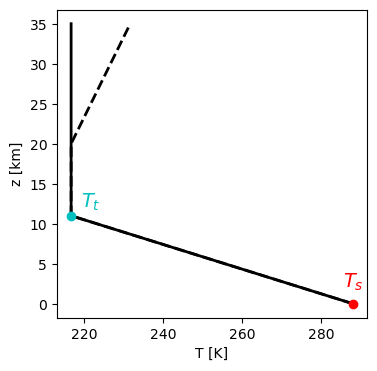

In [6]:
plt.figure(figsize=(4, 4))
plt.plot(simp_atm_T(z),z/1e3,color='k')
plt.plot(std_atm_T(z),z/1e3,color='k',linestyle='dashed')
plt.scatter(Tsurf,0,color='r',zorder=10)
plt.scatter(Tstra,z_tro/1e3,color='c',zorder=10)
plt.xlabel(r'T [K]')
plt.ylabel(r'z [km]')
plt.text(Tsurf-2.5, 2, '$T_{s}$',color='r',fontsize=14)
plt.text(Tstra+2.5, z_tro/1e3+1, '$T_{t}$',color='c',fontsize=14)

plt.savefig('../figures/T_profile.pdf', format='pdf', dpi=300, bbox_inches='tight')